# Locally Weighted Regression Model Implementation

This implementation of the Locally Weighted Regression algorithm is based on the following resources:
- [VTU Pulse](https://vtupulse.com/machine-learning/locally-weighted-regression-algorithm-in-python/#:~:text=Implement%20the%20non-parametric%20Locally%20Weighted%20Regression%20Algorithm%20in)
- [Wikipedia](https://en.wikipedia.org/wiki/Local_regression)

The algorithm is a non-parametric regression method that uses a weighted linear regression to predict the output of a new data point. The weights are calculated based on the distance between the new data point and the training data points. The closer the training data point is to the new data point, the higher the weight assigned to it.

The algorithm is defined by the following steps:
1. For each new data point, calculate the weights for each training data point based on the distance between them.
2. Fit a linear regression model using the training data points and the weights calculated in step 1.
3. Predict the output of the new data point using the linear regression model.

The kernel function used to calculate the weights is the Gaussian kernel function, which is defined as:
$$
w(i) = e^{-\frac{(x^{(i)} - x)^2}{2\tau^2}}
$$
where $x^{(i)}$ is the input feature of the training data point, $x$ is the input feature of the new data point, and $\tau$ is the bandwidth parameter that controls the width of the kernel.

The linear regression model is defined as:
$$
\theta = (X^TWX)^{-1}X^TWY
$$
where $X$ is the matrix of input features of the training data points, $W$ is the diagonal matrix of weights, and $Y$ is the vector of output values of the training data points.

A variation of the normal equation is used to calculate the weights in the linear regression model:
$$
\theta = (X^TWX +  I)^{-1}X^TWY
$$
where $I$ is the identity matrix.

The accuracy of the algorithm can be improved by tuning the bandwidth parameter $\tau$ and the mean squared error can be used as the evaluation metric.

The implementation of the Locally Weighted Regression algorithm is below, with the following functions:
- `kernel(point, data, tau)`: Calculate the weights for each training data point based on the distance between the new data point and the training data points.
- `local_weight(point, data, tau)`: Find the weights for each training data point using the `kernel` function, and a variation of the normal equation to calculate the weights in the linear regression model.
- `local_weight_regression(X_b, Y, tau)`: Fit a linear regression model using the training data points and the weights calculated in the `local_weight` function.
- `compute_mse(Y, Y_pred)`: Calculate the mean squared error between the predicted output and the actual output.

## Implementation

In [1174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The kernel function used in this implementation is the Gaussian kernel function, but other kernel functions can be used as well. The bandwidth parameter $\tau$ can be tuned to improve the accuracy of the algorithm. The kernel function is used to calculate the weights for each training data point based on the distance between the new data point and the training data points. The weights are then used in the linear regression model to predict the output of the new data point.

In [1175]:
def kernel(point, xmat, k):
    """Calculates the kernel function for a given point and data set X_b.
    This kernel function is a Gaussian kernel which assigns weights to each
    point in the data set based on the distance between the point and the
    other points in the data set (based on a Gaussian distribution).
    Args:
        point: the point to calculate the kernel function for
        xmat: the data set
        k: the kernel width (also called the bandwidth, and represented by tau)
    Returns:
        weights: the weights for each point in the data set
    """
    m, n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(float(diff * diff.T) / (-2.0 * k**2))  
    return weights

The `local_weight` function calculates the weights for each training data point using the `kernel` function and a variation of the normal equation to calculate the weights in the linear regression model. The weights are then used in the linear regression model to predict the output of the new data point. To avoid singular matrix errors or linearly dependent features, the pseudo-inverse method is used to calculate the weights in the linear regression model.

In [1176]:
def local_weight(point, xmat, ymat, k):
    """Calculates the local weight for a given point.
    This function calculates the local weight for a given point by using the
    kernel function to assign weights to each point in the data set, and then
    solving the weighted normal equation to find the local regression coefficients.
    Args:
        point: the point to calculate the local weight for
        xmat: the data set
        ymat: the target values
        k: the kernel width (also called the bandwidth, and represented by tau)
    Returns:
        W: the local weight for the given point
    """
    wei = kernel(point, xmat, k)
    XTWX = xmat.T * (wei * xmat)
    XTWY = xmat.T * (wei * ymat)
    W = np.linalg.pinv(XTWX) * XTWY  
    return W

The `local_weight_regression` function fits a linear regression model using the training data points and the weights calculated in the `local_weight` function. The linear regression model is used to predict the output of the new data point.

In [1177]:
def local_weight_regression(xmat, ymat, k):
    """Calculates the local weight regression for a given data set.
    This function calculates the local weight regression for a given data set
    by iterating through each point in the data set, calculating the local weight
    for each point, and then using the local weight to make a prediction for each point.
    Args:
        xmat: the data set
        ymat: the target values
        k: the kernel width (also called the bandwidth, and represented by tau)
    Returns:
        Y_pred: the predicted values
    """
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        W = local_weight(xmat[i], xmat, ymat, k)
        ypred[i] = float(np.dot(xmat[i], W))  
    return ypred

`Mean Squared Error` is used as the evaluation metric to measure the accuracy of the algorithm. The mean squared error is calculated as the average of the squared differences between the predicted output and the actual output.

In [1178]:
def compute_mse(Y_true, Y_pred):
    """Computes the Mean Squared Error (MSE) of the model.
    This function computes the Mean Squared Error (MSE) of the model by
    calculating the average squared difference between the actual target values
    and the predicted values.
    Args:
        Y_true: the actual target values
        Y_pred: the predicted values
    Returns:
        mse: Mean Squared Error
    """
    mse = np.mean((Y_true - Y_pred) ** 2)
    return mse

The function below seeks to find the optimal bandwidth parameter $\tau$ that minimizes the mean squared error of the algorithm. he steps are as follows:
1. Generate a range of values for the bandwidth parameter $\tau$ from 0.1 to 1.0, in increments of 0.001.
2. For each value of $\tau$, fit the Locally Weighted Regression model using the training data points and calculate the mean squared error. Store the mean squared error for each value of $\tau$.
3. Find the value of $\tau$ that minimizes the mean squared error and use it to fit the final Locally Weighted Regression model.
4. Plot the mean squared error for each value of $\tau` to visualize the relationship between the bandwidth parameter and the mean squared error.

In [1179]:
def find_optimal_tau(X_b, y_mat):
    """Finds the optimal tau for the local weight regression model.
    This function finds the optimal tau for the local weight regression model
    by iterating through a range of tau values, calculating the Mean Squared Error (MSE)
    for each tau, and then selecting the tau value that minimizes the MSE. It then
    plots the MSE vs Tau graph to visualize the relationship between the two.
    Args:
        X_b: the data set
        y_mat: the target values
    Returns:
        optimal_tau: the optimal tau value
    """
    taus = np.linspace(0.1, 1, 20)
    mses = []
    for tau in taus:
        y_pred = local_weight_regression(X_b, y_mat, tau)
        mse = compute_mse(y_mat, y_pred)
        mses.append(mse)
    
    optimal_tau = taus[np.argmin(mses)]
    
    plt.plot(taus, mses, 'b-', label='MSE')
    plt.plot(taus[np.argmin(mses)], min(mses), 'ro', label='Minimum MSE/Optimal Tau')
    plt.xlabel('Tau')
    plt.ylabel('MSE')
    plt.legend()
    plt.title('Tau vs MSE')
    plt.show()
    
    return optimal_tau

In [1180]:
def plot_regression_line(X, y, predictions, feature_name, target_name, tau = 0):
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    predictions_sorted = predictions[sorted_indices]

    plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
    plt.plot(X_sorted, predictions_sorted, color='red', label='Regression Line')
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.title(f'{target_name} vs {feature_name}')
    plt.legend()
    plt.show()

In [1181]:
def effect_of_tau_on_regression_line(X_b, y_mat, X, y, y_mean, y_std):
    """Plots the effect of tau on the regression line.
    This function plots the effect of tau on the regression line by
    plotting the regression line for different tau values.
    Args:
        X_b: the data set
        y_mat: the target values
        X: the original feature values
        y: the original target values
        y_mean: the mean of the original target values
        y_std: the standard deviation of the original target values
    """
    taus = np.linspace(0.01, 1, 5)
    plt.figure(figsize=(15, 10))
    for i, tau in enumerate(taus):
        plt.subplot(2, 3, i + 1)
        predictions_normalized = local_weight_regression(X_b, y_mat, tau)
        predictions = predictions_normalized * y_std + y_mean
        plot_regression_line(X, y, predictions, 'Size of Plot (sq. meters)', 'Land Price (GHS)', tau)
    plt.tight_layout()
    plt.show()

## Testing the Implementation

The model is tested on a synthetic dataset, provided in-class when we looked at the Locally Weighted Regression algorithm. The model is only trained on the size of the land and the price of the house, and the goal is to predict the price of a house given the size of the land.

In [1182]:
data = pd.read_csv('simulated_land_price_data.csv')

In [1183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size of Plot (sq. meters)      20 non-null     float64
 1   Distance from Airport (km)     20 non-null     float64
 2   Proximity to Main Road (km)    20 non-null     float64
 3   Proximity to City Center (km)  20 non-null     float64
 4   Land Price (GHS)               20 non-null     float64
dtypes: float64(5)
memory usage: 932.0 bytes


In [1184]:
data.head()

,Size of Plot (sq. meters),Distance from Airport (km),Proximity to Main Road (km),Proximity to City Center (km),Land Price (GHS)
0,287.270059,20.296322,2.098344,12.773546,5838.663580
1,575.357153,8.487347,5.456592,10.426981,5426.483504
2,465.996971,12.303616,1.309497,21.574750,4055.991201
3,399.329242,14.159046,9.183884,12.135067,497.461141
4,178.009320,16.401750,3.329020,10.618690,1784.919488


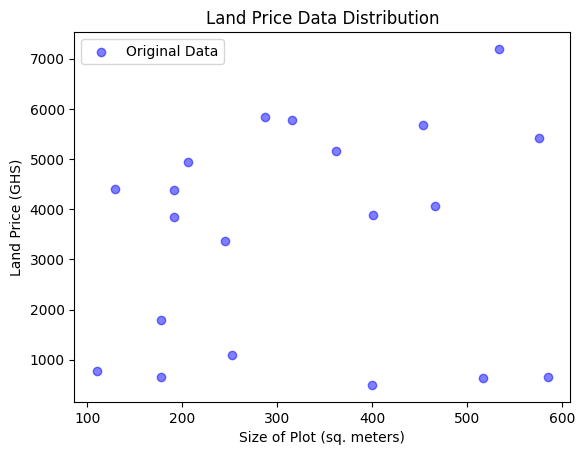

In [1185]:
plt.scatter(data['Size of Plot (sq. meters)'], data['Land Price (GHS)'], color='blue', alpha=0.5, label='Original Data')
plt.xlabel('Size of Plot (sq. meters)')
plt.ylabel('Land Price (GHS)')
plt.title('Land Price Data Distribution')
plt.legend()

Extracting the feature of interest (size of the land) and the target variable (price of the house) from the dataset:

In [1186]:
X = np.array(data['Size of Plot (sq. meters)'])
y = np.array(data['Land Price (GHS)'])

In [1187]:
X

array([287.2700594, 575.3571532, 465.9969709, 399.3292421, 178.0093202,
       177.9972602, 129.0418061, 533.0880729, 400.5575059, 454.0362889,
       110.2922471, 584.9549261, 516.2213204, 206.1695553, 190.9124836,
       191.7022549, 252.1211215, 362.3782158, 315.9725093, 245.6145701])

In [1188]:
y

array([5838.66358  , 5426.483504 , 4055.991201 ,  497.4611415,
       1784.919488 ,  648.1882645, 4403.082131 , 7195.998014 ,
       3882.310222 , 5677.999429 ,  768.9618472,  664.2391914,
        627.1757412, 4935.639968 , 3836.407549 , 4377.118688 ,
       1087.082036 , 5167.420694 , 5775.819997 , 3369.435779 ])

The target values are normalized to improve the performance of the algorithm, as I observed that the algorithm performs better when the target values displayed less variance. As such, predictions are made on the normalized target values, and the predictions are then denormalized to get the actual price of the house.

In [1189]:
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [1190]:
X_mat = np.mat(X_normalized).T
y_mat = np.mat(y_normalized).T

In [1191]:
X_mat

matrix([[-0.27730331],
        [ 1.64394295],
        [ 0.91462239],
        [ 0.47001683],
        [-1.00596069],
        [-1.00604111],
        [-1.33252392],
        [ 1.36205142],
        [ 0.47820809],
        [ 0.83485688],
        [-1.4575643 ],
        [ 1.70795028],
        [ 1.24956743],
        [-0.81816072],
        [-0.91990978],
        [-0.91464282],
        [-0.51171077],
        [ 0.22359128],
        [-0.08588732],
        [-0.55510281]])

In [1192]:
y_mat

matrix([[ 1.10541511],
        [ 0.91050513],
        [ 0.26243249],
        [-1.42031026],
        [-0.81150237],
        [-1.34903505],
        [ 0.42656339],
        [ 1.74726572],
        [ 0.18030295],
        [ 1.02944092],
        [-1.29192415],
        [-1.34144496],
        [-1.35897137],
        [ 0.6783971 ],
        [ 0.15859669],
        [ 0.4142859 ],
        [-1.14149281],
        [ 0.7880006 ],
        [ 1.0756979 ],
        [-0.06222296]])

The intercept term is added to the feature matrix to account for the bias term in the linear regression model.

In [1193]:
m = np.shape(X_mat)[0]
one = np.mat(np.ones(m)).T
X_b = np.hstack((one, X_mat))

In [1194]:
X_b

matrix([[ 1.        , -0.27730331],
        [ 1.        ,  1.64394295],
        [ 1.        ,  0.91462239],
        [ 1.        ,  0.47001683],
        [ 1.        , -1.00596069],
        [ 1.        , -1.00604111],
        [ 1.        , -1.33252392],
        [ 1.        ,  1.36205142],
        [ 1.        ,  0.47820809],
        [ 1.        ,  0.83485688],
        [ 1.        , -1.4575643 ],
        [ 1.        ,  1.70795028],
        [ 1.        ,  1.24956743],
        [ 1.        , -0.81816072],
        [ 1.        , -0.91990978],
        [ 1.        , -0.91464282],
        [ 1.        , -0.51171077],
        [ 1.        ,  0.22359128],
        [ 1.        , -0.08588732],
        [ 1.        , -0.55510281]])

C:\Users\egale\AppData\Local\Temp\ipykernel_21092\1838959028.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(float(diff * diff.T) / (-2.0 * k**2))


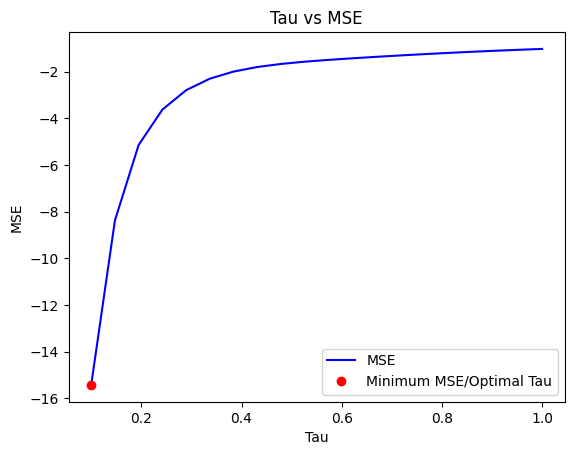

In [1195]:
optimal_tau = find_optimal_tau(X_b, y_mat)

In [1196]:
print(f'Optimal Tau: {optimal_tau}')

Optimal Tau: 0.1


Observations:
The relationship betweeen the bandwidth parameter $\tau$ and the mean squared error (MSE) is used as a proxy to understand the effect of $\tau$ on the model's performance and prediction smoothness. The curve exhibits a steep decline in MSE for small values of $\tau$, followed by a gradual flattening as $\tau$ increases. The red dot at the leftmost part of the curve indicates the minimum MSE, which occurs when $\tau$ is very close to zero. As $\tau$ increases beyond this point, the MSE rapidly increases, and eventually, the curve plateaus. The plateau indicates that further increases in $\tau$ no longer significantly change the MSE, but the model is likely becoming too smooth.

Analysis of $\tau's$ Effect on Prediction Smoothness:
- When \(\tau\) is small, the model prioritizes points very close to the data point being predicted, meaning the model heavily weights nearby points. This creates a regression line that is highly sensitive to local variations. As a result, the predictions tend to be less smooth, as the MSE is minimized implying it is fitting quite well to the data points. This explains why, for small \(\tau\), the MSE is minimized (the model fits very closely to training data), but it may perform poorly on new data (leading to increased MSE after \(\tau\) surpasses the optimal point).
  
- As \(\tau\) increases, the bandwidth expands, and the model starts to incorporate more distant points in the prediction, averaging out local fluctuations. This leads to a smoother regression line, as MSE is not minimized so the curve strays away frm individual data points, but at the cost of losing some of the finer details captured by smaller \(\tau\). At very large \(\tau\), the regression line becomes overly smooth, potentially leading to underfitting, where the model is too simplistic and fails to capture important trends in the data. This is evident from the flatter portion of the curve at larger \(\tau\), where the MSE stops decreasing and stabilizes at a higher value.

Explanation of \(\tau\)'s Influence on the Regression Line:
- Small \(\tau\): The model becomes highly flexible, leading to a regression line that follows the training data closely. This results in high sensitivity to noise and sharp fluctuations, reducing the smoothness of the predictions. The risk is overfitting, where the model does not generalize well to new data.
  
- Large \(\tau\): The model becomes smoother as it gives equal weight to a broader range of points, leading to a more general prediction line that ignores local variations. While this reduces variance, it can lead to underfitting if important patterns are smoothed out too much.

---

After the optimal bandwidth parameter $\tau$ is found, the Locally Weighted Regression model is fitted using the training data points and the optimal $\tau$. The model is then used to predict the output of the new data point. However, the predictions are made on the normalized target values, so the predictions are then denormalized to get the actual price of the house.

In [1197]:
predictions_normalized = local_weight_regression(X_b, y_mat, optimal_tau)

C:\Users\egale\AppData\Local\Temp\ipykernel_21092\1838959028.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(float(diff * diff.T) / (-2.0 * k**2))


Denormalizing the predicted output to get the actual price of the land:

In [1198]:
predictions = predictions_normalized * y_std + y_mean

Printing each prediction and the actual price of the house to compare the results.

In [1199]:
for i in range(m):
    print('predicted:', predictions[i], 'actual:', y[i])

predicted: 5481.985048873656 actual: 5838.66358
predicted: 4418.586386188389 actual: 5426.483504
predicted: 4117.506479707613 actual: 4055.991201
predicted: 2249.642363884897 actual: 497.4611415
predicted: 1451.7250649968141 actual: 1784.919488
predicted: 1449.849457425406 actual: 648.1882645
predicted: 4043.289369119798 actual: 4403.082131
predicted: 6236.285600046107 actual: 7195.998014
predicted: 2212.876042431687 actual: 3882.310222
predicted: 5527.162787248448 actual: 5677.999429
predicted: 771.4654751122239 actual: 768.9618472
predicted: 856.1151590213158 actual: 664.2391914
predicted: 962.0220918044242 actual: 627.1757412
predicted: 4712.35286192077 actual: 4935.639968
predicted: 3514.7985063392966 actual: 3836.407549
predicted: 3623.3404004854215 actual: 4377.118688
predicted: 2314.729069906679 actual: 1087.082036
predicted: 5113.987906449446 actual: 5167.420694
predicted: 5767.032981893062 actual: 5775.819997
predicted: 2550.735696769509 actual: 3369.435779


The mean squared error of the final Locally Weighted Regression model is calculated to evaluate the accuracy of the algorithm.

In [1200]:
error = compute_mse(y, predictions)
print(f'Mean Squared Error: {error:.8f}')

Mean Squared Error: 594083.73703754


The original data is plotted along with the regression line to visualize the relationship between the size of the land and the price of the house. The regression line fits the data well, indicating that the Locally Weighted Regression model is accurate in predicting the price of a house given the size of the land.

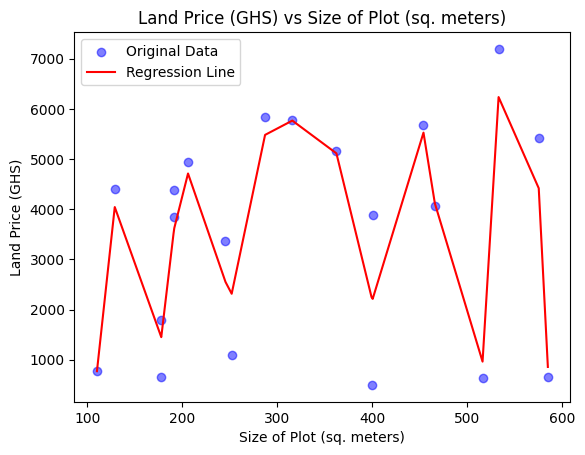

In [1201]:
plot_regression_line(X, y, predictions, 'Size of Plot (sq. meters)', 'Land Price (GHS)')

In [1202]:
def predict_unseen_data(unseen_data, X_b, y_mat, optimal_tau, y_mean, y_std, X_mean, X_std):
    unseen_data_normalized = (unseen_data - X_mean) / X_std
    unseen_data_mat = np.mat(unseen_data_normalized).T
    unseen_data_b = np.hstack((np.ones((unseen_data_mat.shape[0], 1)), unseen_data_mat))

    unseen_predictions_normalized = np.zeros(unseen_data_b.shape[0])
    for i in range(unseen_data_b.shape[0]):
        W = local_weight(unseen_data_b[i], X_b, y_mat, optimal_tau)
        unseen_predictions_normalized[i] = float(np.dot(unseen_data_b[i], W))

    unseen_predictions = unseen_predictions_normalized * y_std + y_mean
    return unseen_predictions

unseen_data = np.array([287, 500, 120, 150, 160, 178])
unseen_predictions = predict_unseen_data(unseen_data, X_b, y_mat, optimal_tau, y_mean, y_std, X_mean, X_std)

for i, size in enumerate(unseen_data):
    print(f'Predicted price for plot size {size} sq. meters: {unseen_predictions[i]:.2f} GHS')

Predicted price for plot size 287 sq. meters: 5465.37 GHS
Predicted price for plot size 500 sq. meters: 1977.88 GHS
Predicted price for plot size 120 sq. meters: 2640.76 GHS
Predicted price for plot size 150 sq. meters: 2997.72 GHS
Predicted price for plot size 160 sq. meters: 2314.60 GHS
Predicted price for plot size 178 sq. meters: 1450.28 GHS


C:\Users\egale\AppData\Local\Temp\ipykernel_21092\1838959028.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(float(diff * diff.T) / (-2.0 * k**2))
C:\Users\egale\AppData\Local\Temp\ipykernel_21092\2899281088.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  unseen_predictions_normalized[i] = float(np.dot(unseen_data_b[i], W))


## References
https://vtupulse.com/machine-learning/locally-weighted-regression-algorithm-in-python/#:~:text=Implement%20the%20non-parametric%20Locally%20Weighted%20Regression%20Algorithm%20in